<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/ul/09_pca_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.set_printoptions(precision=4, suppress=True, edgeitems=5, linewidth=200)

In [0]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df_raw.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
data = df.iloc[:, 1:]
target = df.iloc[:, 0]

data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (133, 13)
X_test shape: (45, 13)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std

array([[ 1.0814, -0.9347, -0.464 , -1.1174, -0.1167, ...,  0.4618,  0.8958,  0.2591,  1.3878,  0.9301],
       [ 1.0568,  1.4974, -0.0521, -0.0478, -0.7754, ..., -0.0282,  1.6692, -1.5938, -1.2312, -0.8557],
       [-1.5005,  0.233 ,  1.9702,  0.105 ,  0.2493, ..., -0.89  , -0.5819,  1.1856, -0.052 , -0.4543],
       [ 0.9215,  1.7081, -0.5015,  0.869 , -0.8486, ..., -0.721 ,  0.6366, -0.7094, -1.0803, -0.7293],
       [ 0.3929, -0.6098, -0.9509, -0.8118, -0.4094, ..., -0.3831, -0.5171,  0.3012,  0.3183,  1.6887],
       ...,
       [ 0.1593, -1.2332, -2.5986, -1.423 , -1.5805, ...,  1.1885,  0.0662,  0.7224,  0.8804, -0.7862],
       [ 1.3764, -0.3464,  0.0228, -0.2617,  0.2493, ...,  1.3574,  0.4551,  0.5118,  0.2908,  0.9775],
       [ 0.8601, -0.5133, -0.127 , -0.7507,  0.3225, ...,  0.6646, -0.5646,  1.1856,  0.4554,  0.7563],
       [-0.062 ,  0.3472,  1.1463,  0.4106, -0.2631, ..., -1.397 , -0.2362, -0.7515, -0.3125, -0.4764],
       [ 0.3806, -0.3903,  1.0714, -0.8729,  0.1761,

In [0]:
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.0076,  0.1089,  0.1414, -0.3335,  0.2458,  0.2478,  0.2245, -0.1842,  0.1179,  0.5331, -0.0682,  0.0963,  0.6725],
       [ 0.1089,  1.0076,  0.1471,  0.3371, -0.0707, -0.3723, -0.4627,  0.3063, -0.2569,  0.2962, -0.5786, -0.4007, -0.2328],
       [ 0.1414,  0.1471,  1.0076,  0.4406,  0.31  ,  0.115 ,  0.1634,  0.1031,  0.041 ,  0.2049,  0.0067,  0.1079,  0.2182],
       [-0.3335,  0.3371,  0.4406,  1.0076,  0.0116, -0.3235, -0.3282,  0.3103, -0.2292,  0.0098, -0.2488, -0.2229, -0.4162],
       [ 0.2458, -0.0707,  0.31  ,  0.0116,  1.0076,  0.2123,  0.2299, -0.2863,  0.2761,  0.1925,  0.0496,  0.0647,  0.3449],
       [ 0.2478, -0.3723,  0.115 , -0.3235,  0.2123,  1.0076,  0.88  , -0.4757,  0.654 , -0.0999,  0.4747,  0.7567,  0.5275],
       [ 0.2245, -0.4627,  0.1634, -0.3282,  0.2299,  0.88  ,  1.0076, -0.5467,  0.6874, -0.186 ,  0.5781,  0.8158,  0.5162],
       [-0.1842,  0.3063,  0.1031,  0.3103, -0.2863, -0.4757, -0.5467,  1.0076, -0.3623,  0.1501, -0.2222, -0.4923, -0

In [0]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [0]:
eigen_vals

array([4.8769, 2.4249, 1.5609, 0.8947, 0.8665, 0.6372, 0.5197, 0.0963, 0.1346, 0.3239, 0.2908, 0.2376, 0.2346])

In [0]:
eigen_vecs

array([[-0.1341, -0.4997, -0.221 ,  0.2246, -0.0054,  0.2652,  0.2125,  0.0364, -0.3527, -0.3796, -0.2136,  0.4196, -0.1614],
       [ 0.2583, -0.2343,  0.134 , -0.0022, -0.5794,  0.1289,  0.5969, -0.0651,  0.1423,  0.1023,  0.0348, -0.3223, -0.1088],
       [-0.0289, -0.2556,  0.6322,  0.2518,  0.171 ,  0.1952, -0.0947,  0.1348, -0.1293,  0.3956,  0.373 ,  0.1652, -0.1912],
       [ 0.2138,  0.0305,  0.6135, -0.0356, -0.0739,  0.0795, -0.2224, -0.0654, -0.0469, -0.6459, -0.1947, -0.1384,  0.1837],
       [-0.1369, -0.2936,  0.2491, -0.6208,  0.4147, -0.1698,  0.3479, -0.0253,  0.0845,  0.1208, -0.3054,  0.0636,  0.0783],
       [-0.3983, -0.0412,  0.0805,  0.0954, -0.239 , -0.1006, -0.1351,  0.4649, -0.358 ,  0.22  , -0.4361, -0.3811,  0.1022],
       [-0.4226,  0.0034,  0.1138,  0.068 , -0.1428, -0.0195, -0.1218, -0.8283, -0.1158,  0.1305, -0.1484, -0.0775, -0.1538],
       [ 0.286 ,  0.0152,  0.103 ,  0.5776,  0.1556, -0.5522,  0.2347, -0.1161,  0.0093,  0.1257, -0.2971,  0.1521,  0

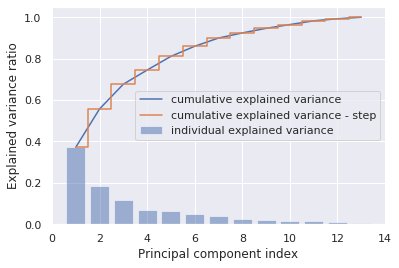

In [0]:
# skumulowana suma wariancji
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.plot(range(1,14), cum_var_exp, label='cumulative explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance - step')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.show()

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [0]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1341 -0.4997]
 [ 0.2583 -0.2343]
 [-0.0289 -0.2556]
 [ 0.2138  0.0305]
 [-0.1369 -0.2936]
 [-0.3983 -0.0412]
 [-0.4226  0.0034]
 [ 0.286   0.0152]
 [-0.3263 -0.0271]
 [ 0.1026 -0.5431]
 [-0.2995  0.2836]
 [-0.3778  0.1484]
 [-0.2856 -0.378 ]]


In [0]:
X_train_std[0].dot(w)

array([-2.7863, -0.8341])

In [0]:
X_train_std.dot(w)

array([[-2.7863, -0.8341],
       [ 2.7232, -1.8165],
       [ 1.0511,  1.0237],
       [ 3.3403, -0.7917],
       [-1.3176,  0.0506],
       [ 2.9664, -2.5365],
       [-0.8976,  1.5342],
       [-3.5181, -1.3318],
       [ 1.3579,  1.5196],
       [ 2.4141, -0.6432],
       [ 0.2394,  2.4662],
       [-2.404 , -1.6027],
       [-1.2229, -1.7628],
       [ 2.5261, -2.725 ],
       [ 0.4162,  2.0484],
       [-0.737 , -0.2021],
       [-3.4847, -1.0692],
       [-1.2003, -0.6731],
       [ 0.5236,  2.7249],
       [ 2.3939, -1.6273],
       [-1.5068,  1.4567],
       [-1.517 ,  2.3001],
       [-1.1066,  2.5617],
       [-1.5343, -0.5347],
       [-2.301 , -2.2213],
       [-3.1639, -0.8229],
       [-2.5152, -1.1886],
       [ 2.4365, -0.5051],
       [ 2.1177, -2.2826],
       [-0.0594,  1.9916],
       [-2.7401, -1.7652],
       [ 2.1949, -2.1886],
       [-0.1088,  1.198 ],
       [-1.8967,  0.384 ],
       [-2.1614,  0.0598],
       [ 1.3383,  2.0077],
       [ 2.2111, -2.4666],
 

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train_std)


In [0]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.372325,0.372325,1
1,0.185131,0.557456,2
2,0.119163,0.676619,3
3,0.068303,0.744922,4
4,0.066155,0.811077,5
5,0.048645,0.859721,6
6,0.039677,0.899399,7
7,0.024728,0.924127,8
8,0.022198,0.946325,9
9,0.018139,0.964464,10


In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained variance ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative explained variance')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=700))
fig.show()